In [2]:
#Import Libraries
%matplotlib inline

import os
import sys
import time
import datetime

import numpy as np
import pandas as pd
import xarray as xr

from glob import glob
from os.path import join, expanduser

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats

from neon_utils import download_eval_files

In [3]:
#Change the 4-character NEON site below to point to your NEON site:
neon_site = "BART"

In [4]:
#Specify the year below
year = "2018"

In [5]:
tree_path = "/home/user/archive/BART_tree/lnd/hist/"
tree_files = sorted(glob(join(tree_path,neon_site+".transient.clm2.h1."+year+"*.nc")))

grass_path = "/home/user/archive/BART_grass/lnd/hist/"
grass_files = sorted(glob(join(grass_path,neon_site+".transient.clm2.h1."+year+"*.nc")))

# tree_path = "/home/user/archive/BART_trees/lnd/hist/"
# tree_files = sorted(glob(join(tree_path,neon_site+".transient.clm2.h1.*.nc")))

# grass_path = "/home/user/archive/BART_grass/lnd/hist/"
# grass_files = sorted(glob(join(grass_path,neon_site+".transient.clm2.h1.*.nc")))



print("All Tree Simulation files: [", len(tree_files), "files]")

print("All Grass Simulation files: [", len(grass_files), "files]")

All Tree Simulation files: [ 365 files]
All Grass Simulation files: [ 365 files]


In [6]:
start = time.time()

ds_tree = xr.open_mfdataset(tree_files, decode_times=True, combine='by_coords')

end = time.time()
print("Reading all simulation files took:", end-start, "seconds.")


Reading all simulation files took: 62.630940198898315 seconds.


In [7]:
start = time.time()

ds_grass = xr.open_mfdataset(grass_files, decode_times=True, combine='by_coords')

end = time.time()
print("Reading all simulation files took:", end-start, "seconds.")


Reading all simulation files took: 63.10289907455444 seconds.


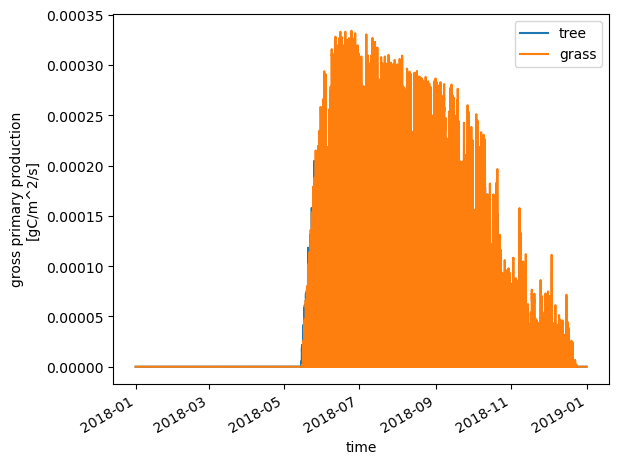

In [8]:
ds_tree['GPP'].plot(label='tree')
ds_grass['GPP'].plot(label='grass')

plt.legend()

plt.show();plt.close()


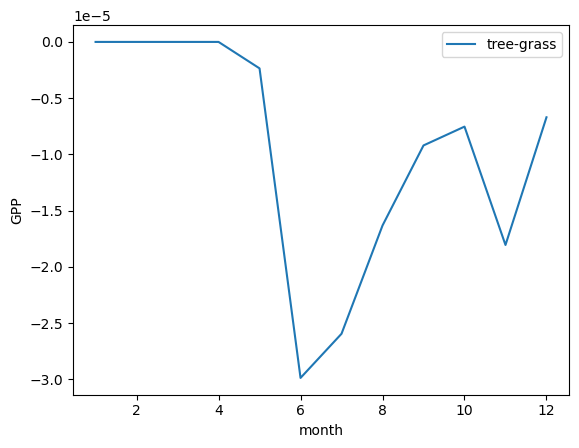

In [9]:
(ds_tree['GPP'] - ds_grass['GPP']).groupby('time.month').mean('time').plot(label='tree-grass')


plt.legend()

plt.show();plt.close()


In [15]:
ds_tree

<xarray.Dataset>
Dimensions:       (levgrnd: 25, levsoi: 20, levlak: 10, levdcmp: 25,
                   time: 17520, hist_interval: 2, lndgrid: 1)
Coordinates:
  * levgrnd       (levgrnd) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * levsoi        (levsoi) float32 0.01 0.04 0.09 0.16 ... 5.06 5.95 6.94 8.03
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp       (levdcmp) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * time          (time) datetime64[ns] 2018-01-01 ... 2018-12-31T23:29:59.12...
Dimensions without coordinates: hist_interval, lndgrid
Data variables: (12/42)
    mcdate        (time) float64 dask.array<chunksize=(96,), meta=np.ndarray>
    mcsec         (time) float64 dask.array<chunksize=(96,), meta=np.ndarray>
    mdcur         (time) float64 dask.array<chunksize=(96,), meta=np.ndarray>
    mscur         (time) float64 dask.array<chunksize=(96,), meta=np.ndarray>
    nstep         (time) float64 dask.array<chunksize=(96,), meta=np.ndarray>
    time_bounds   (time, hist_interval) datetime64[ns] dask.array<chunksize=(96, 2), meta=np.ndarray>
    ...            ...
    HR            (time, lndgrid) float32 dask.array<chunksize=(96, 1), meta=np.ndarray>
    NET_NMIN_vr   (time, levdcmp, lndgrid) float32 dask.array<chunksize=(96, 25, 1), meta=np.ndarray>
    SNOW_DEPTH    (time, lndgrid) float32 dask.array<chunksize=(96, 1), meta=np.ndarray>
    SOILC_vr      (time, levsoi, lndgrid) float32 dask.array<chunksize=(96, 20, 1), meta=np.ndarray>
    TBOT          (time, lndgrid) float32 dask.array<chunksize=(96, 1), meta=np.ndarray>
    TSOI          (time, levgrnd, lndgrid) float32 dask.array<chunksize=(96, 25, 1), meta=np.ndarray>
Attributes: (12/99)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/25/24 17:39:39
    source:                               Community Terrestrial Systems Model
    hostname:                             container
    ...                                   ...
    cft_irrigated_switchgrass:            60
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     minute_30

In [10]:
temp = ds_tree.groupby('time.month').mean('time')
temp

<xarray.Dataset>
Dimensions:      (levgrnd: 25, levsoi: 20, levlak: 10, levdcmp: 25, month: 12,
                  lndgrid: 1)
Coordinates:
  * levgrnd      (levgrnd) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * levsoi       (levsoi) float32 0.01 0.04 0.09 0.16 ... 5.06 5.95 6.94 8.03
  * levlak       (levlak) float32 0.05 0.6 2.1 4.6 8.1 ... 18.6 25.6 34.33 44.78
  * levdcmp      (levdcmp) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: lndgrid
Data variables: (12/39)
    mcdate       (month) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    mcsec        (month) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    mdcur        (month) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    mscur        (month) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    nstep        (month) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    lon          (month, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ...           ...
    HR           (month, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    NET_NMIN_vr  (month, levdcmp, lndgrid) float32 dask.array<chunksize=(1, 25, 1), meta=np.ndarray>
    SNOW_DEPTH   (month, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    SOILC_vr     (month, levsoi, lndgrid) float32 dask.array<chunksize=(1, 20, 1), meta=np.ndarray>
    TBOT         (month, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    TSOI         (month, levgrnd, lndgrid) float32 dask.array<chunksize=(1, 25, 1), meta=np.ndarray>
Attributes: (12/99)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/25/24 22:12:58
    source:                               Community Terrestrial Systems Model
    hostname:                             container
    ...                                   ...
    cft_irrigated_switchgrass:            60
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     minute_30

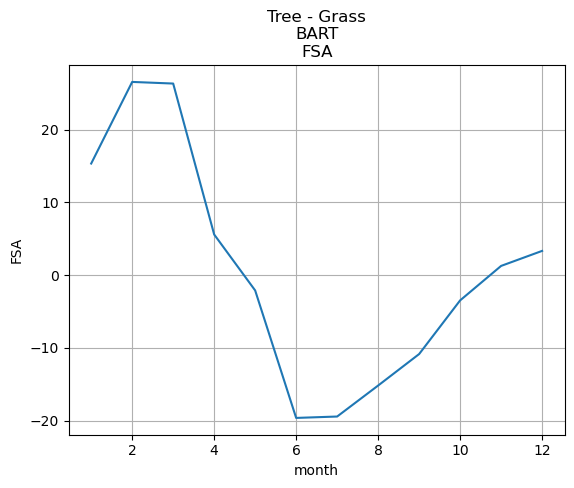

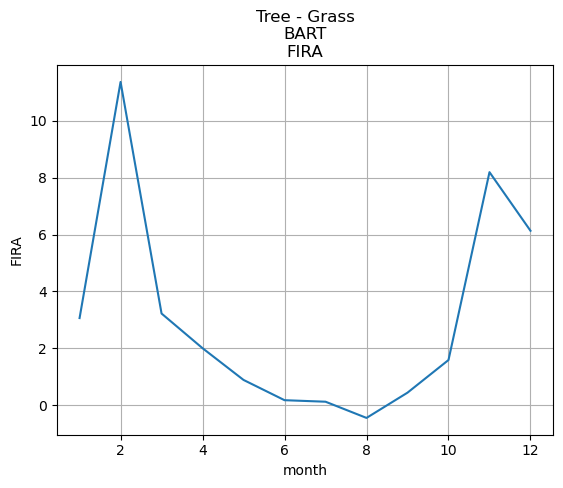

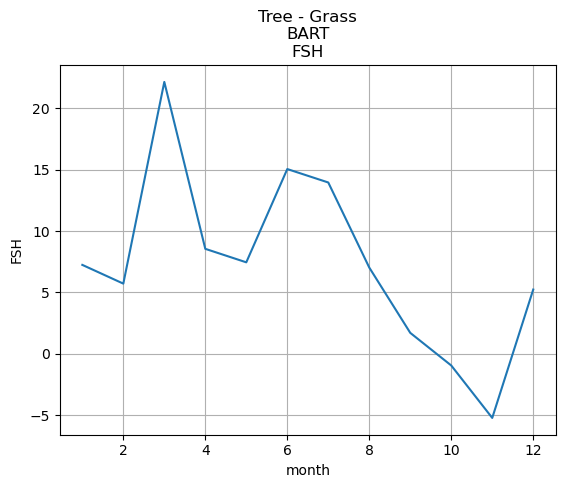

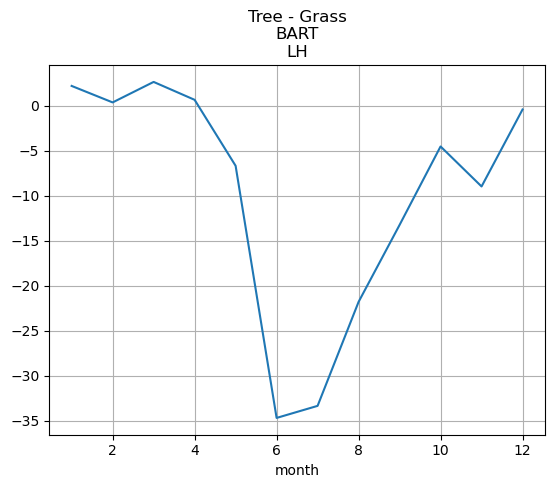

In [11]:
for var in ['FSA','FIRA','FSH','LH',]:
    
    if var == 'LH':
        da_tree_LH = ds_tree['FCTR'] + ds_tree['FCEV']
        da_grass_LH = ds_grass['FCTR'] + ds_grass['FCEV']
        da_delta = da_tree_LH - da_grass_LH
    else:
        da_tree = ds_tree[var]
        da_grass = ds_grass[var]
        da_delta = da_tree - da_grass
        
    da_delta.groupby('time.month').mean('time').plot()
    plt.title('Tree - Grass\n%s\n%s'%(neon_site,var))
    plt.grid(':')
    plt.show();plt.close()
    
    
        
        